In [15]:
import pandas as pd
import numpy as np
import copy


In [16]:
dataset = pd.read_csv('./dataset_ideal.csv')

In [17]:
# Data Exploration
dataset.shape[0]
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [18]:
dataset.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [19]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [20]:
dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [21]:
column_dtypes = dataset.dtypes

print("Data types of each column:")
print(column_dtypes)

Data types of each column:
age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
import pandas_profiling as pp
pp.ProfileReport(dataset)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

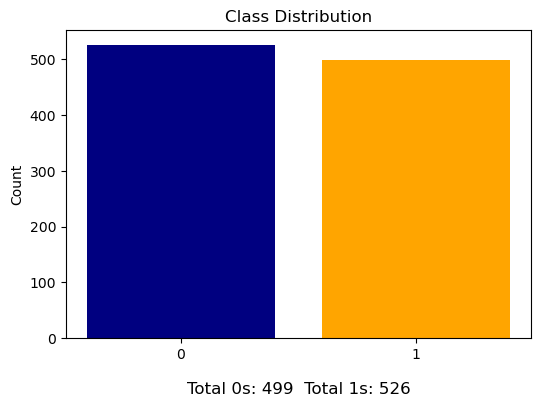

In [24]:
class_distribution = dataset['target'].value_counts()
# Labels
labels = class_distribution.index.astype(str)
targets = ['no disease', 'disease']

# Plot
fig, ax = plt.subplots(figsize=(6, 4))
x = range(len(labels))
counts = class_distribution.values
bars = ax.bar(x, counts, color=['navy', 'orange'])
plt.title('Class Distribution')
total_count_0 = class_distribution[0]
total_count_1 = class_distribution[1]
plt.text(0.5, -100, f'Total 0s: {total_count_0}  Total 1s: {total_count_1}', ha='center', fontsize=12)

plt.ylabel('Count')
plt.xticks(class_distribution.keys())

plt.show()


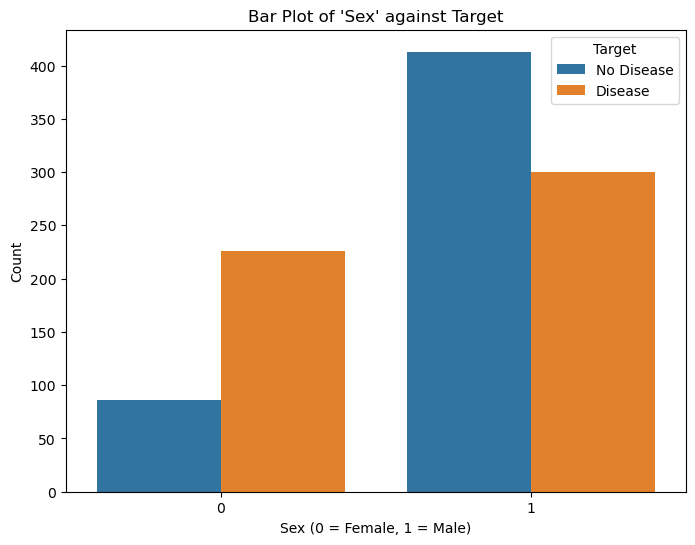

In [25]:
# Bar plot for 'sex' against the target
plt.figure(figsize=(8, 6))
sns.countplot(x='sex', hue='target', data=dataset)
plt.title("Bar Plot of 'Sex' against Target")
plt.xlabel("Sex (0 = Female, 1 = Male)")
plt.ylabel("Count")
plt.legend(title='Target', labels=['No Disease', 'Disease'])
plt.show()

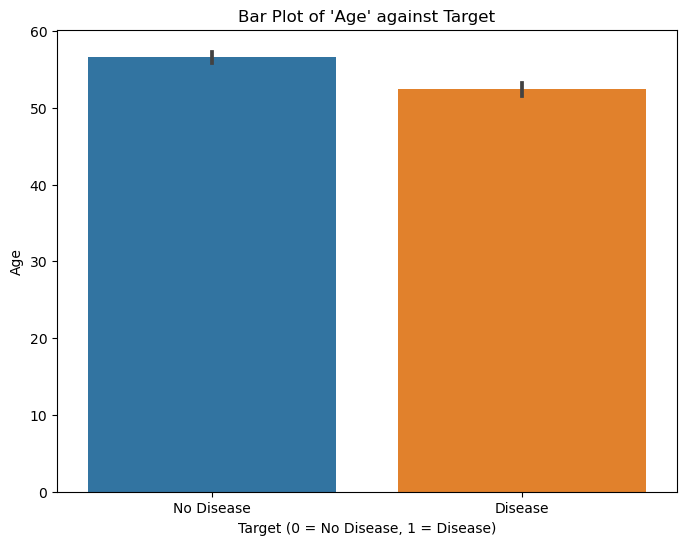

In [26]:
# Box plot for 'age' against the target
plt.figure(figsize=(8, 6))
sns.barplot(x='target', y='age', data=dataset)
plt.title("Bar Plot of 'Age' against Target")
plt.xlabel("Target (0 = No Disease, 1 = Disease)")
plt.ylabel("Age")
plt.xticks(ticks=[0, 1], labels=['No Disease', 'Disease'])
plt.show()

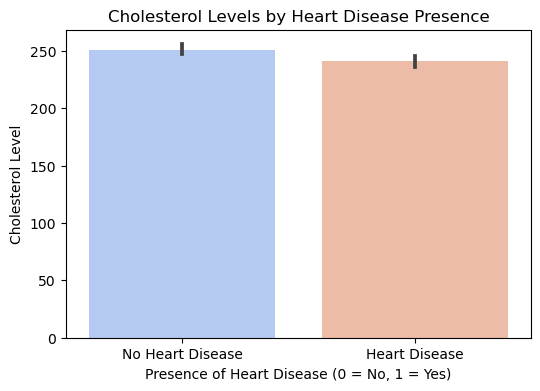

In [27]:
# Box plot for 'cholesterol' against the target
plt.figure(figsize=(6, 4))
sns.barplot(x='target', y='chol', data=dataset, palette='coolwarm')
plt.title("Cholesterol Levels by Heart Disease Presence")
plt.xlabel("Presence of Heart Disease (0 = No, 1 = Yes)")
plt.ylabel("Cholesterol Level")
plt.xticks(ticks=[0, 1], labels=['No Heart Disease', 'Heart Disease'])
plt.show()

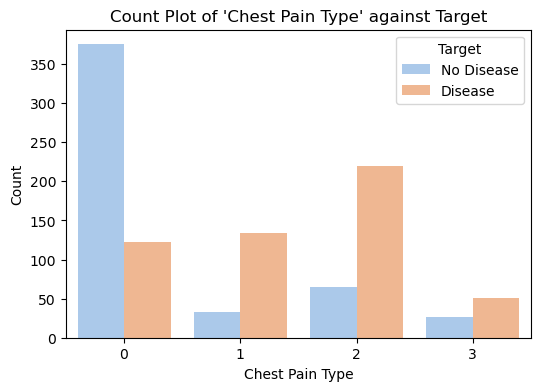

Count of Chest Pain Type by Target:
   cp  target  Count
0   0       0    375
1   0       1    122
2   1       0     33
3   1       1    134
4   2       0     65
5   2       1    219
6   3       0     26
7   3       1     51


In [28]:
# Box plot for 'chest pain type' against the target
plt.figure(figsize=(6, 4))
sns.countplot(x='cp', hue='target', data=dataset, palette='pastel')
plt.title("Count Plot of 'Chest Pain Type' against Target")
plt.xlabel("Chest Pain Type")
plt.ylabel("Count")
plt.legend(title='Target', labels=['No Disease', 'Disease'])
plt.show()

# Count of chest pain type by target
chest_pain_counts = dataset.groupby(['cp', 'target']).size().reset_index(name='Count')

# Print the count information
print("Count of Chest Pain Type by Target:")
print(chest_pain_counts)


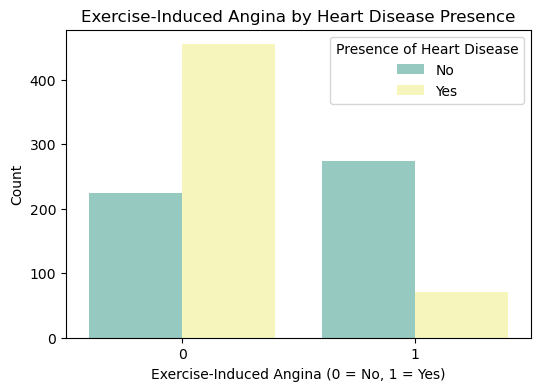

Count of Exercise-Induced Angina by Target:
   cp  target  Count
0   0       0    375
1   0       1    122
2   1       0     33
3   1       1    134
4   2       0     65
5   2       1    219
6   3       0     26
7   3       1     51


In [29]:
#Count Plot of Exercise Induced Angina

plt.figure(figsize=(6, 4))
sns.countplot(x='exang', hue='target', data=dataset, palette='Set3')
plt.title("Exercise-Induced Angina by Heart Disease Presence")
plt.xlabel("Exercise-Induced Angina (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.legend(title="Presence of Heart Disease", labels=['No', 'Yes'])
plt.show()

exeang_counts = dataset.groupby(['exang', 'target']).size().reset_index(name='Count')

# Print the count information
print("Count of Exercise-Induced Angina by Target:")
print(chest_pain_counts)


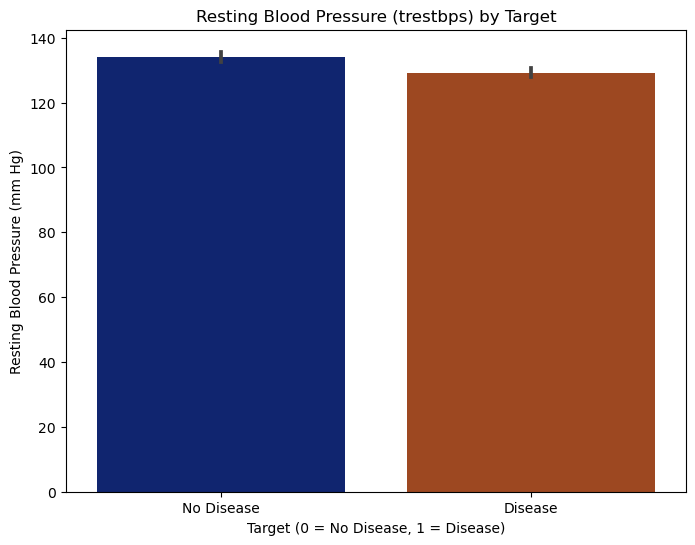

Count of Resting Blood Pressure by Target:
   cp  target  Count
0   0       0    375
1   0       1    122
2   1       0     33
3   1       1    134
4   2       0     65
5   2       1    219
6   3       0     26
7   3       1     51


In [30]:
plt.figure(figsize=(8, 6))
sns.barplot(x='target', y='trestbps', data=dataset, palette='dark')
plt.title("Resting Blood Pressure (trestbps) by Target")
plt.xlabel("Target (0 = No Disease, 1 = Disease)")
plt.ylabel("Resting Blood Pressure (mm Hg)")
plt.xticks(ticks=[0, 1], labels=['No Disease', 'Disease'])
plt.show()

exeang_counts = dataset.groupby(['trestbps', 'target']).size().reset_index(name='Count')

# Print the count information
print("Count of Resting Blood Pressure by Target:")
print(chest_pain_counts)

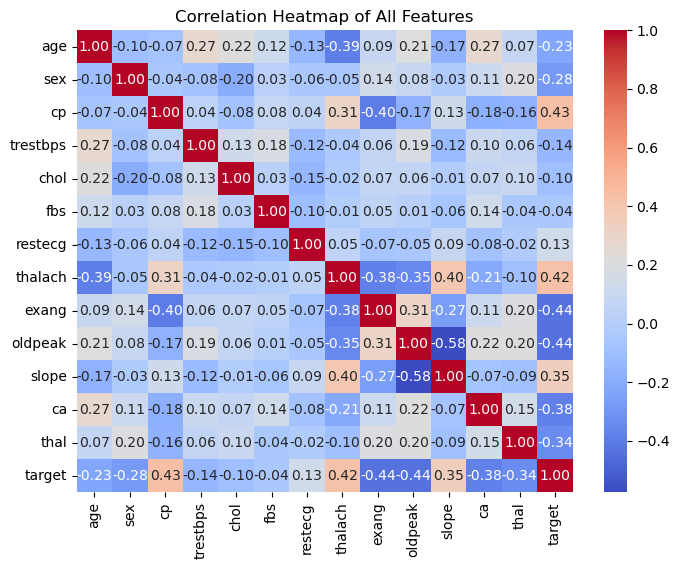

In [31]:
# Compute the correlation matrix
correlation_matrix = dataset.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title("Correlation Heatmap of All Features")
plt.show()

In [32]:
# cp (chest pain type) - Strongest positive correlation (0.43)
# thalach (maximum heart rate achieved) - Second strongest positive correlation (0.42)
# exang (exercise induced angina) - Strongest negative correlation (-0.44)
# oldpeak (ST depression induced by exercise) - Strongest negative correlation (-0.44)
# trestbps (resting blood pressure) - Second strongest positive correlation (0.42)
# ca (number of major vessels colored) - Second strongest negative correlation (-0.38)
# thal (thalassemia) - Third strongest negative correlation (-0.34)
# slope (the slope of the peak exercise ST segment) - Third strongest negative correlation (0.34)

In [33]:
# Check number of unique values for each categorical feature
categorical_columns = []
for column in dataset.columns:
    if dataset[column].dtype == 'object' or dataset[column].nunique() < 10:
        categorical_columns.append(column)

print("Categorical columns:", categorical_columns)
for feature in categorical_columns:
    unique_values = dataset[feature].nunique()
    print(f"Feature '{feature}' has {unique_values} unique values: {dataset[feature].unique()}")

Categorical columns: ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
Feature 'sex' has 2 unique values: [1 0]
Feature 'cp' has 4 unique values: [0 1 2 3]
Feature 'fbs' has 2 unique values: [0 1]
Feature 'restecg' has 3 unique values: [1 0 2]
Feature 'exang' has 2 unique values: [0 1]
Feature 'slope' has 3 unique values: [2 0 1]
Feature 'ca' has 5 unique values: [2 0 1 3 4]
Feature 'thal' has 4 unique values: [3 2 1 0]
Feature 'target' has 2 unique values: [0 1]


In [34]:
X = dataset.drop('target',axis=1)
y = dataset["target"]

# data splitting
from sklearn.model_selection import train_test_split

# Assuming X and y are your feature matrix and target vector
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

# Print the dimensions of each set
print("Training set:", X_train.shape, y_train.shape)
print("Validation set:", X_val.shape, y_val.shape)
print("Test set:", X_test.shape, y_test.shape)



Training set: (615, 13) (615,)
Validation set: (205, 13) (205,)
Test set: (205, 13) (205,)


In [35]:
#Data Preprocessing
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_auc_score, roc_curve, auc


In [37]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression(max_iter=10000)

loss_values = []
# for i in range(1, 5001, 50):  # Assuming 100 iterations
#     loss = -np.sum(np.log(logistic_regression.predict_proba(X_train)[np.arange(len(X_train)), y_train])) / len(X_train)
#     print(f"epoch {i}, loss {loss}")
#     loss_values.append(loss)
    
logistic_regression.fit(X_train, y_train)


LogisticRegression(max_iter=10000)

Accuracy: 0.7951219512195122
Precision: 0.7520661157024794
Recall: 0.883495145631068
Specificity: 0.7058823529411765
F1 Score: 0.8125000000000001
ROC AUC Score: 0.7946887492861221
[[72 30]
 [12 91]]


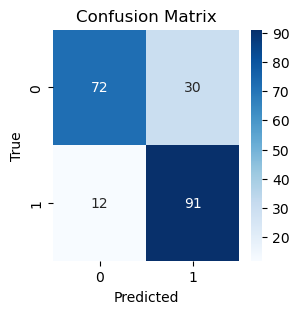

In [38]:
# Logistic Regression: Make predictions on the test set
y_pred_lr = logistic_regression.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_lr)
precision = precision_score(y_test, y_pred_lr)
recall = recall_score(y_test, y_pred_lr)
conf_matrix = confusion_matrix(y_test, y_pred_lr)
tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)
f1_score = 2 * (precision * recall) / (precision + recall)
roc_auc = roc_auc_score(y_test, y_pred_lr)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Specificity:", specificity)
print("F1 Score:", f1_score)
print("ROC AUC Score:", roc_auc)
print(conf_matrix)

plt.figure(figsize=(3, 3))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [39]:
#Naive Bayes

from sklearn.naive_bayes import GaussianNB

naive_bayes_classifier = GaussianNB()

naive_bayes_classifier.fit(X_train, y_train)


GaussianNB()

Accuracy: 0.8048780487804879
Precision: 0.7560975609756098
Recall: 0.9029126213592233
Specificity: 0.7058823529411765
F1 Score: 0.8230088495575221
ROC AUC Score: 0.8043974871501998
[[72 30]
 [10 93]]


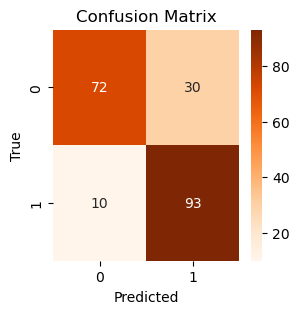

In [40]:
# Naive Bayes: Make predictions on the test set
y_pred_nb = naive_bayes_classifier.predict(X_test)

# Calculate evaluation metrics
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
tn, fp, fn, tp = conf_matrix.ravel()
specificity_nb = tn / (tn + fp)
f1_score_nb = 2 * (precision_nb * recall_nb) / (precision_nb + recall_nb)
roc_auc_nb = roc_auc_score(y_test, y_pred_nb)

# Print evaluation metrics
print("Accuracy:", accuracy_nb)
print("Precision:", precision_nb)
print("Recall:", recall_nb)
print("Specificity:", specificity_nb)
print("F1 Score:", f1_score_nb)
print("ROC AUC Score:", roc_auc_nb)

print(conf_matrix_nb)
plt.figure(figsize=(3, 3))
sns.heatmap(conf_matrix_nb, annot=True, cmap='Oranges', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [41]:
#Random Forest

from sklearn.ensemble import RandomForestClassifier

random_forest_classifier = RandomForestClassifier()

random_forest_classifier.fit(X_train, y_train)


RandomForestClassifier()

Accuracy: 0.975609756097561
Precision: 0.9803921568627451
Recall: 0.970873786407767
Specificity: 0.7058823529411765
F1 Score: 0.975609756097561
ROC AUC Score: 0.975632971635256
Confusion Matrix [[100   2]
 [  3 100]]


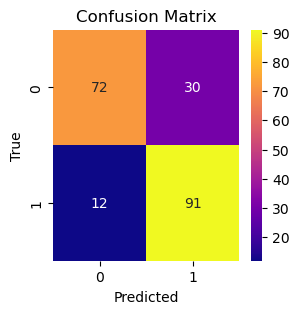

In [42]:
# Random Forest: Make predictions on the test set
y_pred_rf = random_forest_classifier.predict(X_test)

# Calculate evaluation metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
specificity_rf = tn / (tn + fp)
f1_score_rf = 2 * (precision_rf * recall_rf) / (precision_rf + recall_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_rf)

# Print evaluation metrics
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("Specificity:", specificity_rf)
print("F1 Score:", f1_score_rf)
print("ROC AUC Score:", roc_auc_rf)

print('Confusion Matrix', conf_matrix_rf)
plt.figure(figsize=(3, 3))
sns.heatmap(conf_matrix, annot=True, cmap='plasma', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [43]:
#K Nearest Neighbors

from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier()

knn_classifier.fit(X_train, y_train)
knn_classifier.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

Accuracy: 0.8292682926829268
Precision: 0.7931034482758621
Recall: 0.8932038834951457
Specificity: 0.7647058823529411
ROC AUC Score: 0.8289548829240434
[[78 24]
 [11 92]]


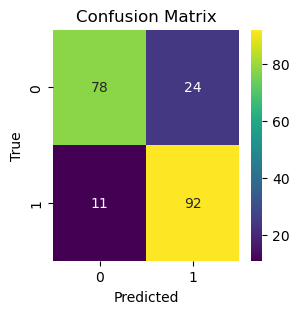

In [44]:
# K Nearest Neighbors Make predictions on the test set
y_pred_knn = knn_classifier.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_knn)
precision = precision_score(y_test, y_pred_knn)
recall = recall_score(y_test, y_pred_knn)
conf_matrix = confusion_matrix(y_test, y_pred_knn)
tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)
npv = tn / (tn + fn)
f1_score = 2 * (precision * recall) / (precision + recall)
roc_auc = roc_auc_score(y_test, y_pred_knn)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Specificity:", specificity)
print("ROC AUC Score:", roc_auc)


print(conf_matrix)
plt.figure(figsize=(3, 3))
sns.heatmap(conf_matrix, annot=True, cmap='viridis', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
# Plot ROC curve
# fpr, tpr, thresholds = roc_curve(y_test, y_pred_knn)
# roc_auc = auc(fpr, tpr)

# plt.figure()
# plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
# plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic (ROC) Curve')
# plt.legend(loc="lower right")
# plt.show()

In [45]:
#Decision Tree

from sklearn.tree import DecisionTreeClassifier

decision_tree_classifier = DecisionTreeClassifier()

decision_tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

Accuracy: 0.9902439024390244
Precision: 1.0
Recall: 0.9805825242718447
Specificity: 1.0
ROC AUC Score: 0.9902912621359223
[[102   0]
 [  2 101]]


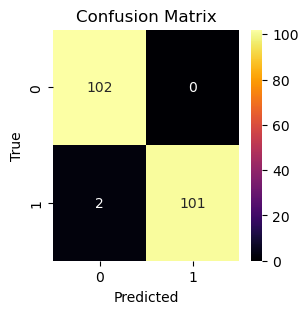

In [46]:
# #Decision Tree Make predictions on the test set
y_pred_dt = decision_tree_classifier.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_dt)
precision = precision_score(y_test, y_pred_dt)
recall = recall_score(y_test, y_pred_dt)
conf_matrix = confusion_matrix(y_test, y_pred_dt)
tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)
npv = tn / (tn + fn)
f1_score = 2 * (precision * recall) / (precision + recall)
roc_auc = roc_auc_score(y_test, y_pred_dt)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Specificity:", specificity)
print("ROC AUC Score:", roc_auc)

print(conf_matrix)
plt.figure(figsize=(3, 3))
sns.heatmap(conf_matrix, annot=True, cmap='inferno', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [47]:
# Support Vector Machines

from sklearn.svm import SVC

svc_classifier = SVC()

svc_classifier.fit(X_train, y_train)
svc_classifier.get_params()


{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

Accuracy: 0.8780487804878049
Precision: 0.8482142857142857
Recall: 0.9223300970873787
Specificity: 0.8333333333333334
F1 Score: 0.8837209302325582
ROC AUC Score: 0.8778317152103561
[[85 17]
 [ 8 95]]


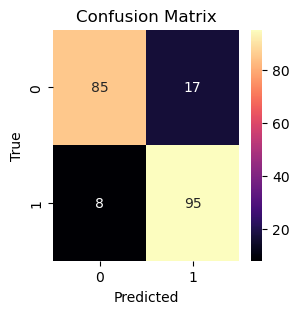

In [48]:
# Support Vector Machines Make predictions on the test set
y_pred_svc = svc_classifier.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_svc)
precision = precision_score(y_test, y_pred_svc)
recall = recall_score(y_test, y_pred_svc)
conf_matrix = confusion_matrix(y_test, y_pred_svc)
tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)
f1_score = 2 * (precision * recall) / (precision + recall)
roc_auc = roc_auc_score(y_test, y_pred_svc)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Specificity:", specificity)
print("F1 Score:", f1_score)
print("ROC AUC Score:", roc_auc)
print(conf_matrix)
plt.figure(figsize=(3, 3))
sns.heatmap(conf_matrix, annot=True, cmap='magma', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

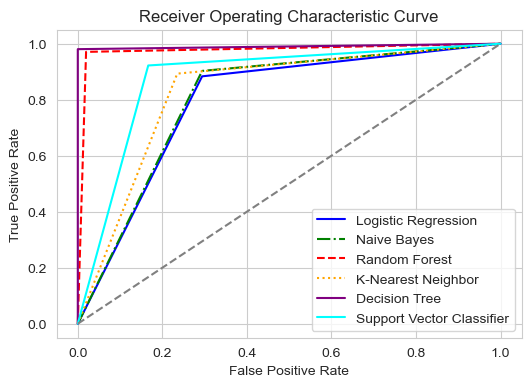

In [49]:
lr_false_positive_rate,lr_true_positive_rate,lr_threshold = roc_curve(y_test,y_pred_lr)
nb_false_positive_rate,nb_true_positive_rate,nb_threshold = roc_curve(y_test,y_pred_nb)
rf_false_positive_rate,rf_true_positive_rate,rf_threshold = roc_curve(y_test,y_pred_rf)                                                             
knn_false_positive_rate,knn_true_positive_rate,knn_threshold = roc_curve(y_test,y_pred_knn)
dt_false_positive_rate,dt_true_positive_rate,dt_threshold = roc_curve(y_test,y_pred_dt)
svc_false_positive_rate,svc_true_positive_rate,svc_threshold = roc_curve(y_test,y_pred_svc)
sns.set_style('whitegrid')
plt.figure(figsize=(6,4))
plt.title('Receiver Operating Characteristic Curve')

# Plot ROC curves for each classifier with different line styles and colors
plt.plot(lr_false_positive_rate, lr_true_positive_rate, label='Logistic Regression', color='blue', linestyle='-')
plt.plot(nb_false_positive_rate, nb_true_positive_rate, label='Naive Bayes', color='green', linestyle='-.')
plt.plot(rf_false_positive_rate, rf_true_positive_rate, label='Random Forest', color='red', linestyle='--')
plt.plot(knn_false_positive_rate, knn_true_positive_rate, label='K-Nearest Neighbor', color='orange', linestyle=':')
plt.plot(dt_false_positive_rate, dt_true_positive_rate, label='Decision Tree', color='purple', linestyle='-')
plt.plot(svc_false_positive_rate, svc_true_positive_rate, label='Support Vector Classifier', color='cyan', linestyle='-')

# Plot the diagonal reference line
plt.plot([0, 1], [0, 1], ls='--', color='.5')

# Add labels and legend
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()

# Show the plot
plt.show()


In [50]:
# Let's do Hyperparameter tuning!!
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import StackingClassifier

In [51]:
# Define hyperparameters for logistic regression
param_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'solver': ['lbfgs', 'sag', 'saga'],
    }

# Create grid search using 5-fold cross validation
grid_search_lr = GridSearchCV(LogisticRegression(max_iter=20000), param_lr, cv=5, scoring='accuracy')

# Perform grid search
grid_search_lr.fit(X_train, y_train)


# Print best parameters
print("Best parameters for Logistic Regression with validation set (Grid Search):", grid_search_lr.best_params_)



Best parameters for Logistic Regression with validation set (Grid Search): {'C': 1, 'solver': 'lbfgs'}


In [52]:
#Logistic Regression: Testing

logistic_regression_best = LogisticRegression(C=0.1, max_iter=10000)
logistic_regression_best.fit(X_train, y_train)

# Before hyperparameter tuning
y_pred_lr_before = logistic_regression.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_lr_before)
precision = precision_score(y_test, y_pred_lr_before)
recall = recall_score(y_test, y_pred_lr_before)
conf_matrix = confusion_matrix(y_test, y_pred_lr_before)
tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)
f1_score = 2 * (precision * recall) / (precision + recall)
roc_auc = roc_auc_score(y_test, y_pred_lr_before)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Specificity:", specificity)
print("F1 Score:", f1_score)
print("ROC AUC Score:", roc_auc)


logistic_tuned_model = grid_search_lr.best_estimator_
y_pred_lr_best = logistic_tuned_model.predict(X_val)

# Calculate evaluation metrics after tuning
accuracy_after = accuracy_score(y_val, y_pred_lr_best)
precision_after = precision_score(y_val, y_pred_lr_best)
recall_after = recall_score(y_val, y_pred_lr_best)
conf_matrix = confusion_matrix(y_val, y_pred_lr_best)
tn, fp, fn, tp = conf_matrix.ravel()
specificity_after = tn / (tn + fp)
f1_score_after = 2 * (precision * recall) / (precision + recall)
roc_auc = roc_auc_score(y_val, y_pred_lr_best)

# Print evaluation metrics after tuning
print("\nEvaluation Metrics after Hyperparameter Tuning (Val Set):")
print("Accuracy:", accuracy_after)
print("Precision:", precision_after)
print("Recall:", recall_after)
print("Specificity:", specificity_after)
print("F1 Score:", f1_score_after)
print("ROC AUC Score:", roc_auc)

Accuracy: 0.7951219512195122
Precision: 0.7520661157024794
Recall: 0.883495145631068
Specificity: 0.7058823529411765
F1 Score: 0.8125000000000001
ROC AUC Score: 0.7946887492861221

Evaluation Metrics after Hyperparameter Tuning (Val Set):
Accuracy: 0.9073170731707317
Precision: 0.8728813559322034
Recall: 0.9626168224299065
Specificity: 0.8469387755102041
F1 Score: 0.8125000000000001
ROC AUC Score: 0.9047777989700553


In [53]:
# Make predictions on the test set using the tuned logistic regression model
logistic_tuned_model = grid_search_lr.best_estimator_
y_pred_lr_test = logistic_tuned_model.predict(X_test)

# Calculate evaluation metrics for the tuned model on the test set
accuracy_test = accuracy_score(y_test, y_pred_lr_test)
precision_test = precision_score(y_test, y_pred_lr_test)
recall_test = recall_score(y_test, y_pred_lr_test)
conf_matrix_test = confusion_matrix(y_test, y_pred_lr_test)
tn_test, fp_test, fn_test, tp_test = conf_matrix_test.ravel()
specificity_test = tn_test / (tn_test + fp_test)
sensitivity_test = tp_test / (tp_test + fn_test)
npv_test = tn_test / (tn_test + fn_test)
f1_score_test = 2 * (precision_test * recall_test) / (precision_test + recall_test)
roc_auc_test = roc_auc_score(y_test, y_pred_lr_test)

# Print the evaluation metrics for the tuned model on the test set
print("\nEvaluation Metrics for Tuned Logistic Regression Model on Test Set:")
print("Accuracy:", accuracy_test)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("Specificity:", specificity_test)
print("Sensitivity:", sensitivity_test)
print("NPV:", npv_test)
print("F1 Score:", f1_score_test)
print("ROC AUC Score:", roc_auc_test)



Evaluation Metrics for Tuned Logistic Regression Model on Test Set:
Accuracy: 0.7951219512195122
Precision: 0.7520661157024794
Recall: 0.883495145631068
Specificity: 0.7058823529411765
Sensitivity: 0.883495145631068
NPV: 0.8571428571428571
F1 Score: 0.8125000000000001
ROC AUC Score: 0.7946887492861221


In [55]:
# Random Forest
rf_param_grid = {
   'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5, 7, 10],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt']


}

grid_search_rf = GridSearchCV(RandomForestClassifier(), rf_param_grid, cv=5, scoring='accuracy')

grid_search_rf.fit(X_train, y_train)

best_params_grid_rf = grid_search_rf.best_params_
best_estimator_grid_rf = grid_search_rf.best_estimator_

print("Results for Random Forest - GridSearchCV:")
print("Best parameters:", best_params_grid_rf)
print("Best estimator:", best_estimator_grid_rf)

D:\Anaconda\envs\workingenv\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
160 fits failed out of a total of 320.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
160 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Anaconda\envs\workingenv\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\envs\workingenv\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "D:\Anaconda\envs\workingenv\lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "D:\Anaconda\envs\workingenv\

Results for Random Forest - GridSearchCV:
Best parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best estimator: RandomForestClassifier(n_estimators=50)


In [ ]:
#Random Forest: Testing

random_forest_best = RandomForestClassifier()
random_forest_best.fit(X_train, y_train)

# Before hyperparameter tuning
y_pred_rf_before = random_forest_best.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_rf_before)
precision = precision_score(y_test, y_pred_rf_before)
recall = recall_score(y_test, y_pred_rf_before)
conf_matrix = confusion_matrix(y_test, y_pred_rf_before)
tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)
f1_score = 2 * (precision * recall) / (precision + recall)
roc_auc = roc_auc_score(y_test, y_pred_rf_before)

# Print evaluation metrics
print("Before HyperParameters Tuning")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Specificity:", specificity)
print("F1 Score:", f1_score)
print("ROC AUC Score:", roc_auc)


random_forest_tuned_model = grid_search_rf.best_estimator_
y_pred_rf_best = random_forest_tuned_model.predict(X_val)

# Calculate evaluation metrics after tuning
accuracy_after = accuracy_score(y_val, y_pred_rf_best)
precision_after = precision_score(y_val, y_pred_rf_best)
recall_after = recall_score(y_val, y_pred_rf_best)
conf_matrix = confusion_matrix(y_val, y_pred_rf_best)
tn, fp, fn, tp = conf_matrix.ravel()
specificity_after = tn / (tn + fp)
f1_score_after = 2 * (precision * recall) / (precision + recall)
roc_auc = roc_auc_score(y_val, y_pred_rf_best)

# Print evaluation metrics after tuning
print("\nEvaluation Metrics after Hyperparameter Tuning (Val Set):")
print("Accuracy:", accuracy_after)
print("Precision:", precision_after)
print("Recall:", recall_after)
print("Specificity:", specificity_after)
print("F1 Score:", f1_score_after)
print("ROC AUC Score:", roc_auc)

Before HyperParameters Tuning
Accuracy: 0.975609756097561
Precision: 0.9803921568627451
Recall: 0.970873786407767
Specificity: 0.9803921568627451
F1 Score: 0.975609756097561
ROC AUC Score: 0.975632971635256

Evaluation Metrics after Hyperparameter Tuning (Val Set):
Accuracy: 0.9951219512195122
Precision: 0.9907407407407407
Recall: 1.0
Specificity: 0.9897959183673469
F1 Score: 0.975609756097561
ROC AUC Score: 0.9948979591836734


In [ ]:
# Make predictions on the test set using the tuned random forest model
random_forest_tuned_model = grid_search_rf.best_estimator_
y_pred_rf_test = random_forest_tuned_model.predict(X_test)

# Calculate evaluation metrics for the tuned model on the test set
accuracy_test = accuracy_score(y_test, y_pred_rf_test)
precision_test = precision_score(y_test, y_pred_rf_test)
recall_test = recall_score(y_test, y_pred_rf_test)
conf_matrix_test = confusion_matrix(y_test, y_pred_rf_test)
tn_test, fp_test, fn_test, tp_test = conf_matrix_test.ravel()
specificity_test = tn_test / (tn_test + fp_test)
sensitivity_test = tp_test / (tp_test + fn_test)
npv_test = tn_test / (tn_test + fn_test)
f1_score_test = 2 * (precision_test * recall_test) / (precision_test + recall_test)
roc_auc_test = roc_auc_score(y_test, y_pred_rf_test)

# Print the evaluation metrics for the tuned model on the test set
print("\nEvaluation Metrics for Tuned Logistic Regression Model on Test Set:")
print("Accuracy:", accuracy_test)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("Specificity:", specificity_test)
print("Sensitivity:", sensitivity_test)
print("NPV:", npv_test)
print("F1 Score:", f1_score_test)
print("ROC AUC Score:", roc_auc_test)



Evaluation Metrics for Tuned Logistic Regression Model on Test Set:
Accuracy: 0.975609756097561
Precision: 0.9803921568627451
Recall: 0.970873786407767
Specificity: 0.9803921568627451
Sensitivity: 0.970873786407767
NPV: 0.970873786407767
F1 Score: 0.975609756097561
ROC AUC Score: 0.975632971635256


In [ ]:
# K-Nearest Neighbors (KNN)
param_grid_knn = {
    'n_neighbors': range(5, 50),
    'weights': ['uniform', 'distance'],
    'algorithm': ['ball_tree', 'kd_tree', 'brute'],
    'metric' : ['minkowski','euclidean','manhattan']
}

grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='accuracy')

grid_search_knn.fit(X_train, y_train)

best_params_grid_knn = grid_search_knn.best_params_
best_estimator_grid_knn = grid_search_knn.best_estimator_

print("Results for K Nearest Neighbors - GridSearchCV:")
print("Best parameters:", best_params_grid_knn)
print("Best estimator:", best_estimator_grid_knn)

Results for K Nearest Neighbors - GridSearchCV:
Best parameters: {'algorithm': 'ball_tree', 'metric': 'manhattan', 'n_neighbors': 44, 'weights': 'distance'}
Best estimator: KNeighborsClassifier(algorithm='ball_tree', metric='manhattan', n_neighbors=44,
                     weights='distance')


In [ ]:
#K Nearest Neighbors: Testing

# Before hyperparameter tuning
y_pred_knn_before = knn_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_knn_before)
precision = precision_score(y_test, y_pred_knn_before)
recall = recall_score(y_test, y_pred_knn_before)
conf_matrix = confusion_matrix(y_test, y_pred_knn_before)
tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)
f1_score = 2 * (precision * recall) / (precision + recall)
roc_auc = roc_auc_score(y_test, y_pred_knn_before)

# Print evaluation metrics
print("Before Hyper Parameters Tuning")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Specificity:", specificity)
print("F1 Score:", f1_score)
print("ROC AUC Score:", roc_auc)

# After hyperparameter tuning
# Make predictions on the test set using tuned model

knn_tuned_model = grid_search_knn.best_estimator_
y_pred_knn_after_gridSearch = knn_tuned_model.predict(X_val)

# Calculate evaluation metrics after tuning
accuracy_after = accuracy_score(y_val, y_pred_knn_after_gridSearch)
precision_after = precision_score(y_val, y_pred_knn_after_gridSearch)
recall_after = recall_score(y_val, y_pred_knn_after_gridSearch)
conf_matrix = confusion_matrix(y_val, y_pred_knn_after_gridSearch)
tn, fp, fn, tp = conf_matrix.ravel()
specificity_after = tn / (tn + fp)
f1_score_after = 2 * (precision * recall) / (precision + recall)
roc_auc = roc_auc_score(y_val, y_pred_knn_after_gridSearch)

# Print evaluation metrics after tuning
print("\nEvaluation Metrics after Hyperparameter Tuning (GridSearch):")
print("Accuracy:", accuracy_after)
print("Precision:", precision_after)
print("Recall:", recall_after)
print("Specificity:", specificity_after)
print("F1 Score:", f1_score_after)
print("ROC AUC Score:", roc_auc)



Before Hyper Parameters Tuning
Accuracy: 0.8292682926829268
Precision: 0.7931034482758621
Recall: 0.8932038834951457
Specificity: 0.7647058823529411
F1 Score: 0.8401826484018265
ROC AUC Score: 0.8289548829240434

Evaluation Metrics after Hyperparameter Tuning (GridSearch):
Accuracy: 0.9804878048780488
Precision: 0.9904761904761905
Recall: 0.9719626168224299
Specificity: 0.9897959183673469
F1 Score: 0.8401826484018265
ROC AUC Score: 0.9808792675948884


In [ ]:
# After hyperparameter tuning
# Make predictions on the test set using tuned model

knn_tuned_model_test = grid_search_knn.best_estimator_
y_pred_knn_after_gridSearch_test = knn_tuned_model_test.predict(X_test)

# Calculate evaluation metrics after tuning
accuracy_after = accuracy_score(y_test, y_pred_knn_after_gridSearch_test)
precision_after = precision_score(y_test, y_pred_knn_after_gridSearch_test)
recall_after = recall_score(y_test, y_pred_knn_after_gridSearch_test)
conf_matrix = confusion_matrix(y_test, y_pred_knn_after_gridSearch_test)
tn, fp, fn, tp = conf_matrix.ravel()
specificity_after = tn / (tn + fp)
sensitivity_after = tp / (tp + fn)
npv_after = tn / (tn + fn)
f1_score_after = 2 * (precision * recall) / (precision + recall)
roc_auc = roc_auc_score(y_test, y_pred_knn_after_gridSearch_test)

# Print evaluation metrics after tuning
print("\nEvaluation Metrics after Hyperparameter Tuning (GridSearch):")
print("Accuracy:", accuracy_after)
print("Precision:", precision_after)
print("Recall:", recall_after)
print("Specificity:", specificity_after)
print("Sensitivity:", sensitivity_after)
print("NPV:", npv_after)
print("F1 Score:", f1_score_after)
print("ROC AUC Score:", roc_auc)


Evaluation Metrics after Hyperparameter Tuning (GridSearch):
Accuracy: 0.9902439024390244
Precision: 0.9809523809523809
Recall: 1.0
Specificity: 0.9803921568627451
Sensitivity: 1.0
NPV: 1.0
F1 Score: 0.8401826484018265
ROC AUC Score: 0.9901960784313725


In [ ]:
# Decision Trees: 
# Define the parameter grid

param_grid = {
    'max_depth': [2, 10, 20, 30],
    'min_samples_split': [2, 4, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}
# Initialize the decision tree classifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Initialize GridSearchCV
grid_search_decision_tree = GridSearchCV(estimator=decision_tree, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform hyperparameter tuning
grid_search_decision_tree.fit(X_train, y_train)

# Best parameters found during grid search
best_params = grid_search_decision_tree.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}


D:\Anaconda\envs\workingenv\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
180 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Anaconda\envs\workingenv\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\envs\workingenv\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "D:\Anaconda\envs\workingenv\lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "D:\Anaconda\envs\workingenv\

In [ ]:
#Decision Trees: Testing

# Before hyperparameter tuning
y_pred_dt_before = decision_tree_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_dt_before)
precision = precision_score(y_test, y_pred_dt_before)
recall = recall_score(y_test, y_pred_dt_before)
conf_matrix = confusion_matrix(y_test, y_pred_dt_before)
tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)
npv = tn / (tn + fn)
f1_score = 2 * (precision * recall) / (precision + recall)
roc_auc = roc_auc_score(y_test, y_pred_dt_before)

# Print evaluation metrics
print("Before Hyper parameters tuning")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Specificity:", specificity)
print("F1 Score:", f1_score)
print("ROC AUC Score:", roc_auc)

# After hyperparameter tuning
# Make predictions on the test set using tuned model

decision_tree_tuned_model = grid_search_decision_tree.best_estimator_
y_pred_dt_after_gridSearch = decision_tree_tuned_model.predict(X_val)

# Calculate evaluation metrics after tuning
accuracy_after = accuracy_score(y_val, y_pred_dt_after_gridSearch)
precision_after = precision_score(y_val, y_pred_dt_after_gridSearch)
recall_after = recall_score(y_val, y_pred_dt_after_gridSearch)
conf_matrix = confusion_matrix(y_val, y_pred_dt_after_gridSearch)
tn, fp, fn, tp = conf_matrix.ravel()
specificity_after = tn / (tn + fp)
f1_score_after = 2 * (precision * recall) / (precision + recall)
roc_auc = roc_auc_score(y_val, y_pred_dt_after_gridSearch)

# Print evaluation metrics after tuning
print("\nEvaluation Metrics after Hyperparameter Tuning (GridSearch):")
print("Accuracy:", accuracy_after)
print("Precision:", precision_after)
print("Recall:", recall_after)
print("Specificity:", specificity_after)
print("F1 Score:", f1_score_after)
print("ROC AUC Score:", roc_auc)

Before Hyper parameters tuning
Accuracy: 0.9707317073170731
Precision: 0.9619047619047619
Recall: 0.9805825242718447
Specificity: 0.9607843137254902
F1 Score: 0.9711538461538461
ROC AUC Score: 0.9706834189986675

Evaluation Metrics after Hyperparameter Tuning (GridSearch):
Accuracy: 0.9902439024390244
Precision: 0.981651376146789
Recall: 1.0
Specificity: 0.9795918367346939
F1 Score: 0.9711538461538461
ROC AUC Score: 0.9897959183673469


In [ ]:
# After hyperparameter tuning
# Make predictions on the test set using tuned model

decision_tree_tuned_model = grid_search_decision_tree.best_estimator_
y_pred_dt_after_gridSearch_test = decision_tree_tuned_model.predict(X_test)

# Calculate evaluation metrics after tuning
accuracy_after = accuracy_score(y_test, y_pred_dt_after_gridSearch_test)
precision_after = precision_score(y_test, y_pred_dt_after_gridSearch_test)
recall_after = recall_score(y_test, y_pred_dt_after_gridSearch_test)
conf_matrix = confusion_matrix(y_test, y_pred_dt_after_gridSearch_test)
tn, fp, fn, tp = conf_matrix.ravel()
specificity_after = tn / (tn + fp)
sensitivity_after = tp / (tp + fn)
npv_after = tn / (tn + fn)
f1_score_after = 2 * (precision_after * recall_after) / (precision_after + recall_after)
roc_auc = roc_auc_score(y_test, y_pred_dt_after_gridSearch_test)

# Print evaluation metrics after tuning
print("\nEvaluation Metrics after Hyperparameter Tuning (GridSearch):")
print("Accuracy:", accuracy_after)
print("Precision:", precision_after)
print("Recall:", recall_after)
print("Specificity:", specificity_after)
print("Sensitivity:", sensitivity_after)
print("NPV:", npv_after)
print("F1 Score:", f1_score_after)
print("ROC AUC Score:", roc_auc)


Evaluation Metrics after Hyperparameter Tuning (GridSearch):
Accuracy: 0.9609756097560975
Precision: 0.9523809523809523
Recall: 0.970873786407767
Specificity: 0.9509803921568627
Sensitivity: 0.970873786407767
NPV: 0.97
F1 Score: 0.9615384615384616
ROC AUC Score: 0.9609270892823149


In [ ]:
# Support Vector Machine (SVM)
param_grid_svc = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

grid_search_svc = GridSearchCV(SVC(), param_grid_svc, cv=5, scoring='accuracy')
# random_search_svc = RandomizedSearchCV(SVC(), param_grid_svc, cv=5, n_iter=100, scoring='accuracy')

grid_search_svc.fit(X_train, y_train)
# random_search_svc.fit(X_val, y_val)

best_params_grid_svc = grid_search_svc.best_params_
best_estimator_grid_svc = grid_search_svc.best_estimator_

# best_params_random_svc = random_search_svc.best_params_
# best_estimator_random_svc = random_search_svc.best_estimator_

print("Results for Support Vector Machines - GridSearchCV:")
print("Best parameters:", best_params_grid_svc)
print("Best estimator:", best_estimator_grid_svc)

# print("\nResults for Support Vector Machines - RandomizedSearchCV:")
# print("Best parameters:", best_params_random_svc)
# print("Best estimator:", best_estimator_random_svc)

Results for Support Vector Machines - GridSearchCV:
Best parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best estimator: SVC(C=10)


In [ ]:
#Support Vector Machines: Testing

# Before hyperparameter tuning
y_pred_svc_before = svc_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_svc_before)
precision = precision_score(y_test, y_pred_svc_before)
recall = recall_score(y_test, y_pred_svc_before)
conf_matrix = confusion_matrix(y_test, y_pred_svc_before)
tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)
f1_score = 2 * (precision * recall) / (precision + recall)
roc_auc = roc_auc_score(y_test, y_pred_svc_before)

# Print evaluation metrics
print('Before Hyper Parameters tuning')
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Specificity:", specificity)
print("F1 Score:", f1_score)
print("ROC AUC Score:", roc_auc)


# After hyperparameter tuning
# Make predictions on the test set using tuned mode
best_svm_grid = grid_search_svc.best_estimator_
y_test_svc_after_gridSearch = best_svm_grid.predict(X_val)

# Calculate evaluation metrics after tuning
accuracy_after = accuracy_score(y_val, y_test_svc_after_gridSearch)
precision_after = precision_score(y_val, y_test_svc_after_gridSearch)
recall_after = recall_score(y_val, y_test_svc_after_gridSearch)
conf_matrix = confusion_matrix(y_val, y_test_svc_after_gridSearch)
tn, fp, fn, tp = conf_matrix.ravel()
specificity_after = tn / (tn + fp)
f1_score_after = 2 * (precision * recall) / (precision + recall)
roc_auc = roc_auc_score(y_val, y_test_svc_after_gridSearch)

# Print evaluation metrics after tuning
print("\nEvaluation Metrics after Hyperparameter Tuning (GridSearch):")
print("Accuracy:", accuracy_after)
print("Precision:", precision_after)
print("Recall:", recall_after)
print("Specificity:", specificity_after)
print("F1 Score:", f1_score_after)
print("ROC AUC Score:", roc_auc)

Before Hyper Parameters tuning
Accuracy: 0.8780487804878049
Precision: 0.8482142857142857
Recall: 0.9223300970873787
Specificity: 0.8333333333333334
F1 Score: 0.8837209302325582
ROC AUC Score: 0.8778317152103561

Evaluation Metrics after Hyperparameter Tuning (GridSearch):
Accuracy: 0.975609756097561
Precision: 0.9811320754716981
Recall: 0.9719626168224299
Specificity: 0.9795918367346939
F1 Score: 0.8837209302325582
ROC AUC Score: 0.9757772267785619


In [ ]:
# After hyperparameter tuning
# Make predictions on the test set using tuned mode
best_svm_grid_test = grid_search_svc.best_estimator_
y_svc_after_gridSearch_test = best_svm_grid_test.predict(X_test)

# Calculate evaluation metrics after tuning
accuracy_after = accuracy_score(y_test, y_svc_after_gridSearch_test)
precision_after = precision_score(y_test, y_svc_after_gridSearch_test)
recall_after = recall_score(y_test, y_svc_after_gridSearch_test)
conf_matrix = confusion_matrix(y_test, y_svc_after_gridSearch_test)
tn, fp, fn, tp = conf_matrix.ravel()
specificity_after = tn / (tn + fp)
sensitivity_after = tp / (tp + fn)
npv_after = tn / (tn + fn)
f1_score_after = 2 * (precision * recall) / (precision + recall)
roc_auc = roc_auc_score(y_test, y_svc_after_gridSearch_test)

# Print evaluation metrics after tuning
print("\nEvaluation Metrics after Hyperparameter Tuning (GridSearch):")
print("Accuracy:", accuracy_after)
print("Precision:", precision_after)
print("Recall:", recall_after)
print("Specificity:", specificity_after)
print("Sensitivity:", sensitivity_after)
print("NPV:", npv_after)
print("F1 Score:", f1_score_after)
print("ROC AUC Score:", roc_auc)



Evaluation Metrics after Hyperparameter Tuning (GridSearch):
Accuracy: 0.9512195121951219
Precision: 0.9603960396039604
Recall: 0.941747572815534
Specificity: 0.9607843137254902
Sensitivity: 0.941747572815534
NPV: 0.9423076923076923
F1 Score: 0.8837209302325582
ROC AUC Score: 0.9512659432705121


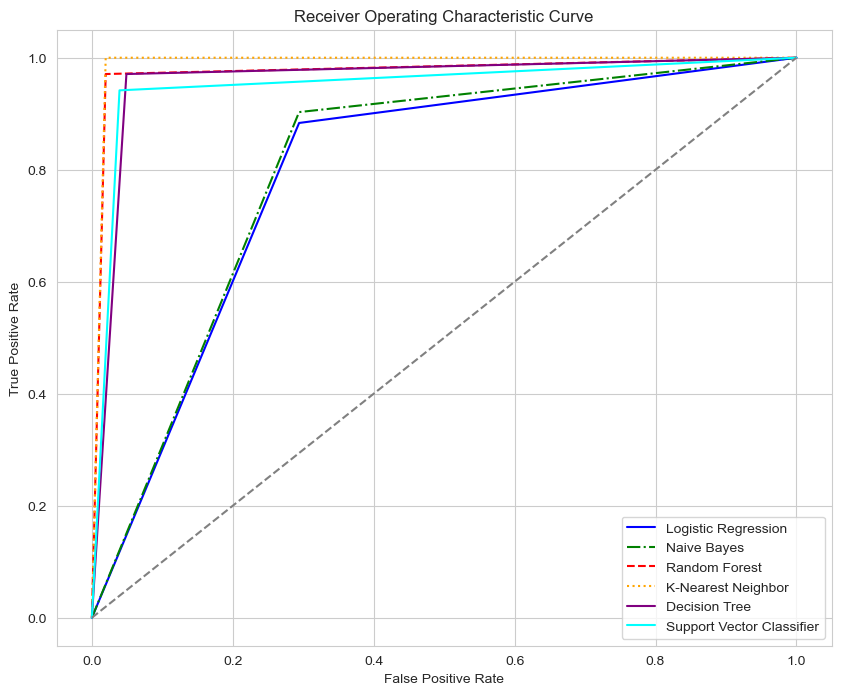

In [ ]:
lr_false_positive_rate,lr_true_positive_rate,lr_threshold = roc_curve(y_test,y_pred_lr_test)
nb_false_positive_rate,nb_true_positive_rate,nb_threshold = roc_curve(y_test,y_pred_nb)
rf_false_positive_rate,rf_true_positive_rate,rf_threshold = roc_curve(y_test,y_pred_rf_test)                                                             
knn_false_positive_rate,knn_true_positive_rate,knn_threshold = roc_curve(y_test,y_pred_knn_after_gridSearch_test)
dt_false_positive_rate,dt_true_positive_rate,dt_threshold = roc_curve(y_test,y_pred_dt_after_gridSearch_test)
svc_false_positive_rate,svc_true_positive_rate,svc_threshold = roc_curve(y_test,y_svc_after_gridSearch_test)
sns.set_style('whitegrid')
plt.figure(figsize=(10,8))
plt.title('Receiver Operating Characteristic Curve')

# Plot ROC curves for each classifier with different line styles and colors
plt.plot(lr_false_positive_rate, lr_true_positive_rate, label='Logistic Regression', color='blue', linestyle='-')
plt.plot(nb_false_positive_rate, nb_true_positive_rate, label='Naive Bayes', color='green', linestyle='-.')
plt.plot(rf_false_positive_rate, rf_true_positive_rate, label='Random Forest', color='red', linestyle='--')
plt.plot(knn_false_positive_rate, knn_true_positive_rate, label='K-Nearest Neighbor', color='orange', linestyle=':')
plt.plot(dt_false_positive_rate, dt_true_positive_rate, label='Decision Tree', color='purple', linestyle='-')
plt.plot(svc_false_positive_rate, svc_true_positive_rate, label='Support Vector Classifier', color='cyan', linestyle='-')

# Plot the diagonal reference line
plt.plot([0, 1], [0, 1], ls='--', color='.5')

# Add labels and legend
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()

# Show the plot
plt.show()

In [ ]:
# LETS DO Feature Selection
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

In [ ]:
#Logistic Regression 
# Wrapper-based feature selection with Recursive Feature Elimination (RFE) for Logistic Regression

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

logistic_regression_rfecv = RFECV(estimator=logistic_regression_best, step=1, cv=cv, scoring='accuracy')

logistic_regression_rfecv.fit(X_train, y_train)

print("Optimal number of features:", logistic_regression_rfecv.n_features_)

X_train_selected_wrapper = logistic_regression_rfecv.fit_transform(X_train, y_train)

selected_features = X.columns[logistic_regression_rfecv.get_support()]

print("Selected features for Random Forest (Wrapper-Based):", selected_features)



Optimal number of features: 6
Selected features for Random Forest (Wrapper-Based): Index(['sex', 'cp', 'thalach', 'oldpeak', 'ca', 'thal'], dtype='object')



Evaluation Metrics before Feature Selection:
Accuracy: 0.7951219512195122
Precision: 0.7520661157024794
Recall: 0.883495145631068
Specificity: 0.7058823529411765
F1 Score: 0.8837209302325582
ROC AUC Score: 0.7946887492861221

Evaluation Metrics after Feature Selection:
Accuracy: 0.8097560975609757
Precision: 0.7758620689655172
Recall: 0.8737864077669902
Specificity: 0.7058823529411765
F1 Score: 0.8837209302325582
ROC AUC Score: 0.8094422234913383
[[76 26]
 [13 90]]


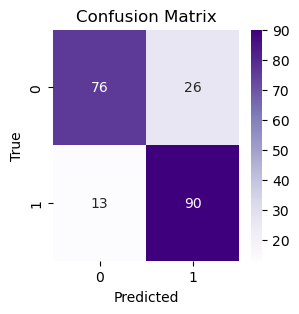

In [ ]:
# After hyperparameter tuning
y_pred_lr_best = logistic_regression_best.predict(X_test)

# Calculate evaluation metrics after tuning
accuracy_after = accuracy_score(y_test, y_pred_lr_best)
precision_after = precision_score(y_test, y_pred_lr_best)
recall_after = recall_score(y_test, y_pred_lr_best)
conf_matrix = confusion_matrix(y_test, y_pred_lr_best)
tn, fp, fn, tp = conf_matrix.ravel()
specificity_after = tn / (tn + fp)
f1_score_after = 2 * (precision * recall) / (precision + recall)
roc_auc = roc_auc_score(y_test, y_pred_lr_best)

# Print evaluation metrics after tuning
print("\nEvaluation Metrics before Feature Selection:")
print("Accuracy:", accuracy_after)
print("Precision:", precision_after)
print("Recall:", recall_after)
print("Specificity:", specificity_after)
print("F1 Score:", f1_score_after)
print("ROC AUC Score:", roc_auc)


# After feature selection
# X_test_selected_features = logistic_regression_rfecv.transform(X_test)

y_pred_lr_filtered = logistic_regression_rfecv.predict(X_test)

# Calculate evaluation metrics after tuning
accuracy_after = accuracy_score(y_test, y_pred_lr_filtered)
precision_after = precision_score(y_test, y_pred_lr_filtered)
recall_after = recall_score(y_test, y_pred_lr_filtered)
conf_matrix_test = confusion_matrix(y_test, y_pred_lr_filtered)
tn, fp, fn, tp = conf_matrix.ravel()
specificity_after = tn / (tn + fp)
f1_score_after = 2 * (precision * recall) / (precision + recall)
roc_auc = roc_auc_score(y_test, y_pred_lr_filtered)

# Print evaluation metrics after tuning
print("\nEvaluation Metrics after Feature Selection:")
print("Accuracy:", accuracy_after)
print("Precision:", precision_after)
print("Recall:", recall_after)
print("Specificity:", specificity_after)
print("F1 Score:", f1_score_after)
print("ROC AUC Score:", roc_auc)

print(conf_matrix_test)

plt.figure(figsize=(3, 3))
sns.heatmap(conf_matrix_test, annot=True, cmap='Purples', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Naive Bayes

from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.preprocessing import MinMaxScaler

# Apply Min-Max scaling to ensure non-negative values
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

naive_bayes_selector = SelectKBest(score_func=mutual_info_classif, k=8)


X_train_selected = naive_bayes_selector.fit_transform(X_train_scaled, y_train)

nb_filtered = GaussianNB()

nb_filtered.fit(X_train_selected, y_train)

selected_features_mask = naive_bayes_selector.get_support()

# Count the number of selected features
num_selected_features = np.sum(selected_features_mask)

print("Number of selected features:", num_selected_features)

selected_feature_indices = naive_bayes_selector.get_support(indices=True)

# Get the names of selected features
selected_features = X.columns[selected_feature_indices]

print("Selected features:", selected_features)

Number of selected features: 8
Selected features: Index(['cp', 'trestbps', 'chol', 'thalach', 'exang', 'oldpeak', 'ca', 'thal'], dtype='object')



Evaluation Metrics before Feature Selection:
Accuracy: 0.8048780487804879
Precision: 0.7560975609756098
Recall: 0.9029126213592233
Specificity: 0.7058823529411765
F1 Score: 0.8837209302325582
ROC AUC Score: 0.8043974871501998

Evaluation Metrics after Feature Selection:
Accuracy: 0.7951219512195122
Precision: 0.7563025210084033
Recall: 0.8737864077669902
Specificity: 0.7058823529411765
F1 Score: 0.8837209302325582
ROC AUC Score: 0.7947363411383972
[[73 29]
 [13 90]]


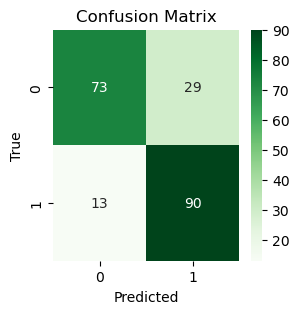

In [ ]:
# Naive Bayes Model
y_pred_nb = naive_bayes_classifier.predict(X_test)

# Calculate evaluation metrics after tuning
accuracy_after = accuracy_score(y_test, y_pred_nb)
precision_after = precision_score(y_test, y_pred_nb)
recall_after = recall_score(y_test, y_pred_nb)
conf_matrix = confusion_matrix(y_test, y_pred_nb)
tn, fp, fn, tp = conf_matrix.ravel()
specificity_after = tn / (tn + fp)
sensitivity_after = tp / (tp + fn)
npv_after = tn / (tn + fn)
f1_score_after = 2 * (precision * recall) / (precision + recall)
roc_auc = roc_auc_score(y_test, y_pred_nb)

# Print evaluation metrics after tuning
print("\nEvaluation Metrics before Feature Selection:")
print("Accuracy:", accuracy_after)
print("Precision:", precision_after)
print("Recall:", recall_after)
print("Specificity:", specificity_after)
print("F1 Score:", f1_score_after)
print("ROC AUC Score:", roc_auc)


# After feature selection
X_test_scaled = scaler.fit_transform(X_test)
X_test_filtered = naive_bayes_selector.transform(X_test_scaled)
y_pred_nb_filtered = nb_filtered.predict(X_test_filtered)

# Calculate evaluation metrics after tuning
accuracy_after = accuracy_score(y_test, y_pred_nb_filtered)
precision_after = precision_score(y_test, y_pred_nb_filtered)
recall_after = recall_score(y_test, y_pred_nb_filtered)
conf_matrix_test = confusion_matrix(y_test, y_pred_nb_filtered)
tn, fp, fn, tp = conf_matrix.ravel()
specificity_after = tn / (tn + fp)
sensitivity_after = tp / (tp + fn)
npv_after = tn / (tn + fn)
f1_score_after = 2 * (precision * recall) / (precision + recall)
roc_auc = roc_auc_score(y_test, y_pred_nb_filtered)

# Print evaluation metrics after tuning
print("\nEvaluation Metrics after Feature Selection:")
print("Accuracy:", accuracy_after)
print("Precision:", precision_after)
print("Recall:", recall_after)
print("Specificity:", specificity_after)
print("F1 Score:", f1_score_after)
print("ROC AUC Score:", roc_auc)

print(conf_matrix_test)

plt.figure(figsize=(3, 3))
sns.heatmap(conf_matrix_test, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# K Nearest Neighbors

from sklearn.feature_selection import SelectKBest, mutual_info_classif

knn_selector = SelectKBest(score_func=mutual_info_classif, k=10)

X_train_selected = knn_selector.fit_transform(X_train, y_train)

# Train KNeighborsClassifier using the selected features


grid_search_knn_filtered = copy.copy(grid_search_knn)
best_params_knn = grid_search_knn_filtered.best_params_

knn_classifier_filtered = KNeighborsClassifier(**best_params_knn)
knn_classifier_filtered.fit(X_train_selected, y_train)

selected_features_mask = knn_selector.get_support()

# Count the number of selected features
num_selected_features = np.sum(selected_features_mask)

print("Number of selected features:", num_selected_features)


selected_feature_indices = knn_selector.get_support(indices=True)

# Get the names of selected features
selected_features = X.columns[selected_feature_indices]

print("Selected features:", selected_features)

Number of selected features: 10
Selected features: Index(['age', 'cp', 'trestbps', 'chol', 'thalach', 'exang', 'oldpeak', 'slope',
       'ca', 'thal'],
      dtype='object')



Evaluation Metrics after Hyperparameter Tuning:
Accuracy: 0.9902439024390244
Precision: 0.9809523809523809
Recall: 1.0
Specificity: 0.9803921568627451
F1 Score: 0.8837209302325582
ROC AUC Score: 0.9901960784313725
(205, 10)

Evaluation Metrics before Feature Selection:
Accuracy: 0.9902439024390244
Precision: 0.9809523809523809
Recall: 1.0
Specificity: 0.9803921568627451
F1 Score: 0.8837209302325582
ROC AUC Score: 0.9901960784313725
[[100   2]
 [  0 103]]


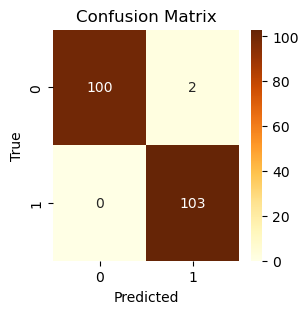

In [ ]:
# After hyperparameter tuning
y_pred_knn_after_gridSearch = knn_tuned_model.predict(X_test)

# Calculate evaluation metrics after tuning
accuracy_after = accuracy_score(y_test, y_pred_knn_after_gridSearch)
precision_after = precision_score(y_test, y_pred_knn_after_gridSearch)
recall_after = recall_score(y_test, y_pred_knn_after_gridSearch)
conf_matrix = confusion_matrix(y_test, y_pred_knn_after_gridSearch)
tn, fp, fn, tp = conf_matrix.ravel()
specificity_after = tn / (tn + fp)
sensitivity_after = tp / (tp + fn)
npv_after = tn / (tn + fn)
f1_score_after = 2 * (precision * recall) / (precision + recall)
roc_auc = roc_auc_score(y_test, y_pred_knn_after_gridSearch)

# Print evaluation metrics after tuning
print("\nEvaluation Metrics after Hyperparameter Tuning:")
print("Accuracy:", accuracy_after)
print("Precision:", precision_after)
print("Recall:", recall_after)
print("Specificity:", specificity_after)
print("F1 Score:", f1_score_after)
print("ROC AUC Score:", roc_auc)

# After feature selection
X_test_selected = knn_selector.transform(X_test)
print(X_test_selected.shape)
y_pred_knn_filtered = knn_classifier_filtered.predict(X_test_selected)

# Calculate evaluation metrics after tuning
accuracy_after = accuracy_score(y_test, y_pred_knn_filtered)
precision_after = precision_score(y_test, y_pred_knn_filtered)
recall_after = recall_score(y_test, y_pred_knn_filtered)
conf_matrix_test = confusion_matrix(y_test, y_pred_knn_filtered)
tn, fp, fn, tp = conf_matrix.ravel()
specificity_after = tn / (tn + fp)
sensitivity_after = tp / (tp + fn)
npv_after = tn / (tn + fn)
f1_score_after = 2 * (precision * recall) / (precision + recall)
roc_auc = roc_auc_score(y_test, y_pred_knn_filtered)

# Print evaluation metrics after tuning
print("\nEvaluation Metrics before Feature Selection:")
print("Accuracy:", accuracy_after)
print("Precision:", precision_after)
print("Recall:", recall_after)
print("Specificity:", specificity_after)
print("F1 Score:", f1_score_after)
print("ROC AUC Score:", roc_auc)


print(conf_matrix_test)

plt.figure(figsize=(3, 3))
sns.heatmap(conf_matrix_test, annot=True, cmap='YlOrBr', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# Random Forest: Feature Selection
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

random_forest_filtering = RandomForestClassifier()

random_forest_rfecv = RFECV(estimator=random_forest_classifier, step=1, cv=cv, scoring='accuracy')

random_forest_rfecv.fit(X_train, y_train)

print("Optimal number of features:", random_forest_rfecv.n_features_)

X_train_selected_wrapper = random_forest_rfecv.fit_transform(X_train, y_train)

selected_features = X.columns[random_forest_rfecv.get_support()]

print("Selected features for Random Forest (Wrapper-Based):", selected_features)



Optimal number of features: 8
Selected features for Random Forest (Wrapper-Based): Index(['age', 'cp', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca', 'thal'], dtype='object')



Evaluation Metrics before Feature Selection:
Accuracy: 0.975609756097561
Precision: 0.9803921568627451
Recall: 0.970873786407767
Specificity: 0.9803921568627451
F1 Score: 0.8837209302325582
ROC AUC Score: 0.975632971635256

Evaluation Metrics after Feature Selection:
Accuracy: 0.975609756097561
Precision: 0.9803921568627451
Recall: 0.970873786407767
Specificity: 0.9803921568627451
F1 Score: 0.975609756097561
ROC AUC Score: 0.975632971635256
[[100   2]
 [  3 100]]


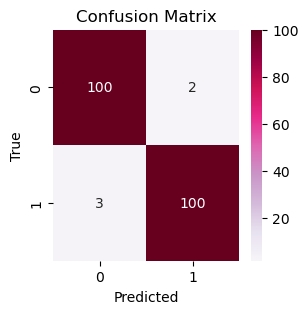

In [ ]:
# After hyperparameter tuning
y_pred_random_forest_best = random_forest_classifier.predict(X_test)

# Calculate evaluation metrics after tuning
accuracy_after = accuracy_score(y_test, y_pred_random_forest_best)
precision_after = precision_score(y_test, y_pred_random_forest_best)
recall_after = recall_score(y_test, y_pred_random_forest_best)
conf_matrix = confusion_matrix(y_test, y_pred_random_forest_best)
tn, fp, fn, tp = conf_matrix.ravel()
specificity_after = tn / (tn + fp)
sensitivity_after = tp / (tp + fn)
npv_after = tn / (tn + fn)
f1_score_after = 2 * (precision * recall) / (precision + recall)
roc_auc = roc_auc_score(y_test, y_pred_random_forest_best)

# Print evaluation metrics after tuning
print("\nEvaluation Metrics before Feature Selection:")
print("Accuracy:", accuracy_after)
print("Precision:", precision_after)
print("Recall:", recall_after)
print("Specificity:", specificity_after)
print("F1 Score:", f1_score_after)
print("ROC AUC Score:", roc_auc)


# After feature selection
# X_test_selected_features = logistic_regression_rfecv.transform(X_test)

y_pred_random_forest_filtered = random_forest_rfecv.predict(X_test)

# Calculate evaluation metrics after tuning
accuracy_after = accuracy_score(y_test, y_pred_random_forest_filtered)
precision_after = precision_score(y_test, y_pred_random_forest_filtered)
recall_after = recall_score(y_test, y_pred_random_forest_filtered)
conf_matrix_test = confusion_matrix(y_test, y_pred_random_forest_filtered)
tn, fp, fn, tp = conf_matrix.ravel()
specificity_after = tn / (tn + fp)
sensitivity_after = tp / (tp + fn)
npv_after = tn / (tn + fn)
f1_score_after = 2 * (precision_after * recall_after) / (precision_after + recall_after)
roc_auc = roc_auc_score(y_test, y_pred_random_forest_filtered)

# Print evaluation metrics after tuning
print("\nEvaluation Metrics after Feature Selection:")
print("Accuracy:", accuracy_after)
print("Precision:", precision_after)
print("Recall:", recall_after)
print("Specificity:", specificity_after)
print("F1 Score:", f1_score_after)
print("ROC AUC Score:", roc_auc)


print(conf_matrix_test)

plt.figure(figsize=(3, 3))
sns.heatmap(conf_matrix_test, annot=True, cmap='PuRd', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# Decision Trees: Feature Selection

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

decision_trees_rfecv = RFECV(estimator=decision_tree_classifier, step=1, cv=cv, scoring='accuracy')

decision_trees_rfecv.fit(X_train, y_train)

print("Optimal number of features:", decision_trees_rfecv.n_features_)

X_train_selected_wrapper = decision_trees_rfecv.fit_transform(X_train, y_train)

selected_features = X.columns[decision_trees_rfecv.get_support()]

print("Selected features for Decision Trees (Wrapper-Based):", selected_features)



Optimal number of features: 8
Selected features for Decision Trees (Wrapper-Based): Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')



Evaluation Metrics before Feature Selection:
Accuracy: 0.9707317073170731
Precision: 0.9619047619047619
Recall: 0.9805825242718447
Specificity: 0.9607843137254902
F1 Score: 0.8837209302325582
ROC AUC Score: 0.9706834189986675

Evaluation Metrics after Feature Selection:
Accuracy: 0.9804878048780488
Precision: 0.9805825242718447
Recall: 0.9805825242718447
Specificity: 0.9607843137254902
F1 Score: 0.9805825242718447
ROC AUC Score: 0.9804873405672949
[[100   2]
 [  2 101]]


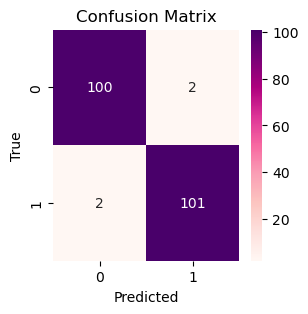

In [ ]:
# After hyperparameter tuning
y_pred_decision_best = decision_tree_classifier.predict(X_test)

# Calculate evaluation metrics after tuning
accuracy_after = accuracy_score(y_test, y_pred_decision_best)
precision_after = precision_score(y_test, y_pred_decision_best)
recall_after = recall_score(y_test, y_pred_decision_best)
conf_matrix = confusion_matrix(y_test, y_pred_decision_best)
tn, fp, fn, tp = conf_matrix.ravel()
specificity_after = tn / (tn + fp)
sensitivity_after = tp / (tp + fn)
npv_after = tn / (tn + fn)
f1_score_after = 2 * (precision * recall) / (precision + recall)
roc_auc = roc_auc_score(y_test, y_pred_decision_best)

# Print evaluation metrics after tuning
print("\nEvaluation Metrics before Feature Selection:")
print("Accuracy:", accuracy_after)
print("Precision:", precision_after)
print("Recall:", recall_after)
print("Specificity:", specificity_after)
print("F1 Score:", f1_score_after)
print("ROC AUC Score:", roc_auc)


# After feature selection
# X_test_selected_features = logistic_regression_rfecv.transform(X_test)

y_pred_decision_trees_filtered = decision_trees_rfecv.predict(X_test)

# Calculate evaluation metrics after tuning
accuracy_after = accuracy_score(y_test, y_pred_decision_trees_filtered)
precision_after = precision_score(y_test, y_pred_decision_trees_filtered)
recall_after = recall_score(y_test, y_pred_decision_trees_filtered)
conf_matrix_test = confusion_matrix(y_test, y_pred_decision_trees_filtered)
tn, fp, fn, tp = conf_matrix.ravel()
specificity_after = tn / (tn + fp)
sensitivity_after = tp / (tp + fn)
npv_after = tn / (tn + fn)
f1_score_after = 2 * (precision_after * recall_after) / (precision_after + recall_after)
roc_auc = roc_auc_score(y_test, y_pred_decision_trees_filtered)

# Print evaluation metrics after tuning
print("\nEvaluation Metrics after Feature Selection:")
print("Accuracy:", accuracy_after)
print("Precision:", precision_after)
print("Recall:", recall_after)
print("Specificity:", specificity_after)
print("F1 Score:", f1_score_after)
print("ROC AUC Score:", roc_auc)


print(conf_matrix_test)

plt.figure(figsize=(3, 3))
sns.heatmap(conf_matrix_test, annot=True, cmap='RdPu', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# Support Vector Machines: Feature Selection
svm_selector = SelectKBest(score_func=mutual_info_classif, k=13)
X_train_selected = svm_selector.fit_transform(X_train, y_train)

feature_scores = svm_selector.scores_

# Get the p-values of all features (if applicable)
# p_values = svm_selector.pvalues_  # Uncomment if using a scoring function that supports p-values

# Get the indices of the selected features
selected_feature_indices = svm_selector.get_support(indices=True)

# Get the names of the selected features
selected_features = X.columns[selected_feature_indices]

# Print details
print("Selected Features:")
for feature, score in zip(selected_features, feature_scores[selected_feature_indices]):
    print(f"Feature: {feature}, Score: {score}")
# Train SVM Classifier using the selected features

grid_search_svm_filtered = copy.copy(grid_search_svc)
best_params_svm = grid_search_svm_filtered.best_params_

svm_classifier_filtered = SVC(**best_params_svm)
svm_classifier_filtered.fit(X_train_selected, y_train)


Selected Features:
Feature: age, Score: 0.11943488155505566
Feature: sex, Score: 0.04326817650116621
Feature: cp, Score: 0.14450529811040713
Feature: trestbps, Score: 0.0623124022070245
Feature: chol, Score: 0.1785400598151876
Feature: fbs, Score: 0.0
Feature: restecg, Score: 0.02645413897071247
Feature: thalach, Score: 0.15982183438875674
Feature: exang, Score: 0.08456900931628786
Feature: oldpeak, Score: 0.16354731339701334
Feature: slope, Score: 0.08910389414085573
Feature: ca, Score: 0.1147388091937962
Feature: thal, Score: 0.12563386431926427


SVC(C=10)


Evaluation Metrics before Feature Selection:
Accuracy: 0.9512195121951219
Precision: 0.9603960396039604
Recall: 0.941747572815534
Specificity: 0.9607843137254902
F1 Score: 0.8837209302325582
ROC AUC Score: 0.9512659432705121

Evaluation Metrics after Feature Selection:
Accuracy: 0.9512195121951219
Precision: 0.9603960396039604
Recall: 0.941747572815534
Specificity: 0.9607843137254902
F1 Score: 0.9509803921568628
ROC AUC Score: 0.9512659432705121
[[98  4]
 [ 6 97]]


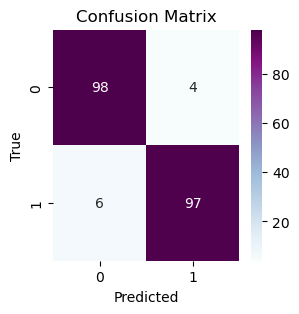

In [ ]:
# After hyperparameter tuning
y_pred_svm_best = best_svm_grid_test.predict(X_test)

# Calculate evaluation metrics after tuning
accuracy_after = accuracy_score(y_test, y_pred_svm_best)
precision_after = precision_score(y_test, y_pred_svm_best)
recall_after = recall_score(y_test, y_pred_svm_best)
conf_matrix = confusion_matrix(y_test, y_pred_svm_best)
tn, fp, fn, tp = conf_matrix.ravel()
specificity_after = tn / (tn + fp)
sensitivity_after = tp / (tp + fn)
npv_after = tn / (tn + fn)
f1_score_after = 2 * (precision * recall) / (precision + recall)
roc_auc = roc_auc_score(y_test, y_pred_svm_best)

# Print evaluation metrics after tuning
print("\nEvaluation Metrics before Feature Selection:")
print("Accuracy:", accuracy_after)
print("Precision:", precision_after)
print("Recall:", recall_after)
print("Specificity:", specificity_after)
print("F1 Score:", f1_score_after)
print("ROC AUC Score:", roc_auc)


# After feature selection
# X_test_selected_features = logistic_regression_rfecv.transform(X_test)

X_test_filtered = svm_selector.transform(X_test)
y_pred_svm_filtered = svm_classifier_filtered.predict(X_test_filtered)

# Calculate evaluation metrics after tuning
accuracy_after = accuracy_score(y_test, y_pred_svm_filtered)
precision_after = precision_score(y_test, y_pred_svm_filtered)
recall_after = recall_score(y_test, y_pred_svm_filtered)
conf_matrix_test = confusion_matrix(y_test, y_pred_svm_filtered)
tn, fp, fn, tp = conf_matrix.ravel()
specificity_after = tn / (tn + fp)
sensitivity_after = tp / (tp + fn)
npv_after = tn / (tn + fn)
f1_score_after = 2 * (precision_after * recall_after) / (precision_after + recall_after)
roc_auc = roc_auc_score(y_test, y_pred_svm_filtered)

# Print evaluation metrics after tuning
print("\nEvaluation Metrics after Feature Selection:")
print("Accuracy:", accuracy_after)
print("Precision:", precision_after)
print("Recall:", recall_after)
print("Specificity:", specificity_after)
print("F1 Score:", f1_score_after)
print("ROC AUC Score:", roc_auc)

print(conf_matrix_test)

plt.figure(figsize=(3, 3))
sns.heatmap(conf_matrix_test, annot=True, cmap='BuPu', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

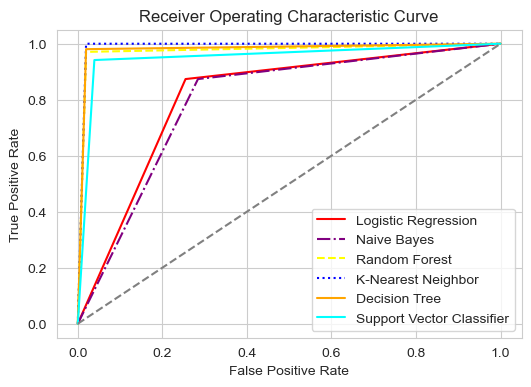

In [ ]:
lr_false_positive_rate,lr_true_positive_rate,lr_threshold = roc_curve(y_test,y_pred_lr_filtered)
nb_false_positive_rate,nb_true_positive_rate,nb_threshold = roc_curve(y_test,y_pred_nb_filtered)
rf_false_positive_rate,rf_true_positive_rate,rf_threshold = roc_curve(y_test,y_pred_random_forest_filtered)                                                       
knn_false_positive_rate,knn_true_positive_rate,knn_threshold = roc_curve(y_test,y_pred_knn_filtered)
dt_false_positive_rate,dt_true_positive_rate,dt_threshold = roc_curve(y_test,y_pred_decision_trees_filtered)
svc_false_positive_rate,svc_true_positive_rate,svc_threshold = roc_curve(y_test,y_pred_svm_filtered)
sns.set_style('whitegrid')
plt.figure(figsize=(6,4))
plt.title('Receiver Operating Characteristic Curve')

# Plot ROC curves for each classifier with different line styles and colors
plt.plot(lr_false_positive_rate, lr_true_positive_rate, label='Logistic Regression', color='red', linestyle='-')
plt.plot(nb_false_positive_rate, nb_true_positive_rate, label='Naive Bayes', color='purple', linestyle='-.')
plt.plot(rf_false_positive_rate, rf_true_positive_rate, label='Random Forest', color='yellow', linestyle='--')
plt.plot(knn_false_positive_rate, knn_true_positive_rate, label='K-Nearest Neighbor', color='blue', linestyle=':')
plt.plot(dt_false_positive_rate, dt_true_positive_rate, label='Decision Tree', color='orange', linestyle='-')
plt.plot(svc_false_positive_rate, svc_true_positive_rate, label='Support Vector Classifier', color='cyan', linestyle='-')

# Plot the diagonal reference line
plt.plot([0, 1], [0, 1], ls='--', color='.5')

# Add labels and legend
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()

# Show the plot
plt.show()

In [ ]:
print("Logistic Regression ROC Curve:")
for fpr, tpr, threshold in zip(lr_false_positive_rate, lr_true_positive_rate, lr_threshold):
    print(f"FPR: {fpr}, TPR: {tpr}, Threshold: {threshold}")

print("\nNaive Bayes ROC Curve:")
for fpr, tpr, threshold in zip(nb_false_positive_rate, nb_true_positive_rate, nb_threshold):
    print(f"FPR: {fpr}, TPR: {tpr}, Threshold: {threshold}")

print("\nRandom Forest ROC Curve:")
for fpr, tpr, threshold in zip(rf_false_positive_rate, rf_true_positive_rate, rf_threshold):
    print(f"FPR: {fpr}, TPR: {tpr}, Threshold: {threshold}")

print("\nK Nearest Neighbors ROC Curve:")
for fpr, tpr, threshold in zip(knn_false_positive_rate, knn_true_positive_rate, knn_threshold):
    print(f"FPR: {fpr}, TPR: {tpr}, Threshold: {threshold}")

print("\nDecision Trees ROC Curve:")
for fpr, tpr, threshold in zip(dt_false_positive_rate, dt_true_positive_rate, dt_threshold):
    print(f"FPR: {fpr}, TPR: {tpr}, Threshold: {threshold}")

print("\nSupport Vector Machines ROC Curve:")
for fpr, tpr, threshold in zip(svc_false_positive_rate, svc_true_positive_rate, svc_threshold):
    print(f"FPR: {fpr}, TPR: {tpr}, Threshold: {threshold}")


Logistic Regression ROC Curve:
FPR: 0.0, TPR: 0.0, Threshold: inf
FPR: 0.2549019607843137, TPR: 0.8737864077669902, Threshold: 1.0
FPR: 1.0, TPR: 1.0, Threshold: 0.0

Naive Bayes ROC Curve:
FPR: 0.0, TPR: 0.0, Threshold: inf
FPR: 0.28431372549019607, TPR: 0.8737864077669902, Threshold: 1.0
FPR: 1.0, TPR: 1.0, Threshold: 0.0

Random Forest ROC Curve:
FPR: 0.0, TPR: 0.0, Threshold: inf
FPR: 0.0196078431372549, TPR: 0.970873786407767, Threshold: 1.0
FPR: 1.0, TPR: 1.0, Threshold: 0.0

K Nearest Neighbors ROC Curve:
FPR: 0.0, TPR: 0.0, Threshold: inf
FPR: 0.0196078431372549, TPR: 1.0, Threshold: 1.0
FPR: 1.0, TPR: 1.0, Threshold: 0.0

Decision Trees ROC Curve:
FPR: 0.0, TPR: 0.0, Threshold: inf
FPR: 0.0196078431372549, TPR: 0.9805825242718447, Threshold: 1.0
FPR: 1.0, TPR: 1.0, Threshold: 0.0

Support Vector Machines ROC Curve:
FPR: 0.0, TPR: 0.0, Threshold: inf
FPR: 0.0392156862745098, TPR: 0.941747572815534, Threshold: 1.0
FPR: 1.0, TPR: 1.0, Threshold: 0.0


In [ ]:
#Ensemble Techniques

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.pipeline import Pipeline

D:\Anaconda\envs\workingenv\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(



Evaluation Metrics after Bagging:
Accuracy: 0.9609756097560975
Precision: 0.9523809523809523
Recall: 0.970873786407767
Specificity: 0.9509803921568627
F1 Score: 0.9852216748768473
ROC AUC Score: 0.9854368932038835
Confusion Matrix:
[[102   0]
 [  3 100]]


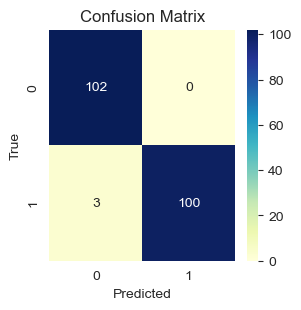

In [ ]:
#Bagging Ensemble (Homogeneous)

# Create a base classifier (e.g., Decision Tree)
base_classifier = DecisionTreeClassifier(random_state=42)

# Create a BaggingClassifier
bagging_clf = BaggingClassifier(base_estimator=base_classifier, n_estimators=30, random_state=42)

# Train the BaggingClassifier
bagging_clf.fit(X_train, y_train)

# Make predictions
y_pred_bagging = bagging_clf.predict(X_test)

accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
recall_bagging = recall_score(y_test, y_pred_bagging)
precision_bagging = precision_score(y_test, y_pred_bagging)
conf_matrix_bagging = confusion_matrix(y_test, y_pred_bagging)
tn, fp, fn, tp = conf_matrix.ravel()
specificity_after = tn / (tn + fp)
sensitivity_after = tp / (tp + fn)
npv_after = tn / (tn + fn)
f1_score_after = 2 * (precision_bagging * recall_bagging) / (precision_bagging + recall_bagging)
roc_auc = roc_auc_score(y_test, y_pred_bagging)
confusion_matrix_bagging = confusion_matrix(y_test, y_pred_bagging)


# Print evaluation metrics after tuning
print("\nEvaluation Metrics after Bagging:")
print("Accuracy:", accuracy_after)
print("Precision:", precision_after)
print("Recall:", recall_after)
print("Specificity:", specificity_after)
print("F1 Score:", f1_score_after)
print("ROC AUC Score:", roc_auc)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_bagging))

plt.figure(figsize=(3, 3))
sns.heatmap(conf_matrix_bagging, annot=True, cmap='YlGnBu', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.975609756097561
Precision: 1.0
Recall: 0.9514563106796117
Specificity: 1.0
F1 Score: 0.9751243781094527
ROC AUC Score: 0.9757281553398058
[[102   0]
 [  5  98]]


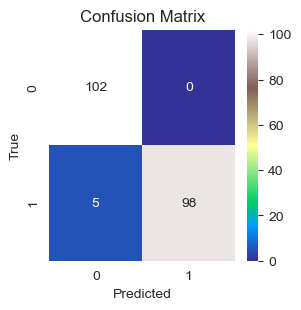

In [ ]:
# Ensemble Tuned Models (heterogeneous)
base_models = [
    ('Logistic Regression', grid_search_lr.best_estimator_),
    ('Naive Bayes', naive_bayes_classifier),
    ('Random Forest', grid_search_rf.best_estimator_),
    # ('Decision Tree', grid_search_decision_tree.best_estimator_),
    ('K Nearest Neighbors', grid_search_knn.best_estimator_),
    ('Support Vector Machines', grid_search_svc.best_estimator_)
]

stacking_clf = StackingClassifier(
    estimators=base_models,
    final_estimator=grid_search_decision_tree.best_estimator_
)

# Train the stacking classifier on the training set
stacking_clf.fit(X_train, y_train)

# Evaluate the stacking classifier on the test set
y_pred_test_stacking = stacking_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_test_stacking)
precision = precision_score(y_test, y_pred_test_stacking)
recall = recall_score(y_test, y_pred_test_stacking)
conf_matrix = confusion_matrix(y_test, y_pred_test_stacking)
tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)
npv = tn / (tn + fn)
f1_score = 2 * (precision * recall) / (precision + recall)
roc_auc = roc_auc_score(y_test, y_pred_test_stacking)
confusion_matrix_stacking  = confusion_matrix(y_test, 
y_pred_test_stacking)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Specificity:", specificity)
print("F1 Score:", f1_score)
print("ROC AUC Score:", roc_auc)

print(confusion_matrix_stacking)

plt.figure(figsize=(3, 3))
sns.heatmap(confusion_matrix_stacking, annot=True, cmap='terrain', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# # Ensemble Tuned Models
# base_models = [
#     ('Logistic Regression', logistic_regression),
#     ('Naive Bayes', naive_bayes_classifier),
#     ('Random Forest', random_forest_classifier),
#     # ('Decision Tree', grid_search_decision_tree.best_estimator_),
#     ('K Nearest Neighbors', knn_classifier),
#     ('Support Vector Machines', svc_classifier)
# ]

# stacking_clf = StackingClassifier(
#     estimators=base_models,
#     final_estimator=decision_tree_classifier
# )

# # Train the stacking classifier on the training set
# stacking_clf.fit(X_train, y_train)

# # Evaluate the stacking classifier on the test set
# y_pred_test_stacking = stacking_clf.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred_test_stacking)
# precision = precision_score(y_test, y_pred_test_stacking)
# recall = recall_score(y_test, y_pred_test_stacking)
# conf_matrix = confusion_matrix(y_test, y_pred_test_stacking)
# tn, fp, fn, tp = conf_matrix.ravel()
# specificity = tn / (tn + fp)
# sensitivity = tp / (tp + fn)
# npv = tn / (tn + fn)
# f1_score = 2 * (precision * recall) / (precision + recall)
# roc_auc = roc_auc_score(y_test, y_pred_test_stacking)
# confusion_matrix_stacking  = confusion_matrix(y_test, 
# y_pred_test_stacking)

# # Print evaluation metrics
# print("Accuracy:", accuracy)
# print("Precision:", precision)
# print("Recall:", recall)
# print("Specificity:", specificity)
# print("F1 Score:", f1_score)
# print("ROC AUC Score:", roc_auc)

# print(confusion_matrix_stacking)

# plt.figure(figsize=(3, 3))
# sns.heatmap(confusion_matrix_stacking, annot=True, cmap='terrain', fmt='g')
# plt.xlabel('Predicted')
# plt.ylabel('True')
# plt.title('Confusion Matrix')
# plt.show()

In [ ]:
# # Ensemble Feature Selection
# base_models = [
#     ('Logistic Regression', grid_search_lr.best_estimator_),
#     ('Naive Bayes', naive_bayes_classifier),
#     ('Random Forest', grid_search_rf.best_estimator_),
#     ('Decision Tree', grid_search_decision_tree.best_estimator_),
#     ('K Nearest Neighbors', grid_search_knn.best_estimator_),
#     ('Support Vector Machines', grid_search_svc.best_estimator_)
# ]

# # Define feature selection models
# cv_lr = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# cv_rf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# feature_selection_models = [
#     ('RFECV Logistic', RFECV(estimator=LogisticRegression(), step=1, cv=cv_lr, scoring='accuracy')),
#     ('SelectKBest Naive Bayes', SelectKBest(score_func=mutual_info_classif, k=10)),
#     ('SelectKBest KNN', SelectKBest(score_func=mutual_info_classif, k=10)),
#     ('RFECV Random Forest', RFECV(estimator=RandomForestClassifier(), step=1, cv=cv_rf, scoring='accuracy')),
#     ('SelectKBest SVM', SelectKBest(score_func=mutual_info_classif, k=11))
# ]

# estimators = []
# for model, fs_model in feature_selection_models:
#     for base_name, base_model in base_models:
#         estimators.append((f"{model} + {base_name}", Pipeline([('Feature Selection', fs_model), (base_name, base_model)])))

# stacking_clf = StackingClassifier(
#     estimators=base_models,
#     final_estimator= grid_search_knn
# )


# # Train the stacking classifier on the training set
# stacking_clf.fit(X_train, y_train)

# # Evaluate the stacking classifier on the test set
# y_pred_test_stacking = stacking_clf.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred_test_stacking)
# precision = precision_score(y_test, y_pred_test_stacking)
# recall = recall_score(y_test, y_pred_test_stacking)
# conf_matrix = confusion_matrix(y_test, y_pred_test_stacking)
# tn, fp, fn, tp = conf_matrix.ravel()
# specificity = tn / (tn + fp)
# sensitivity = tp / (tp + fn)
# npv = tn / (tn + fn)
# f1_score = 2 * (precision * recall) / (precision + recall)
# roc_auc = roc_auc_score(y_test, y_pred_test_stacking)

# # Print evaluation metrics
# print("Accuracy:", accuracy)
# print("Precision:", precision)
# print("Recall:", recall)
# print("Specificity:", specificity)
# print("F1 Score:", f1_score)
# print("ROC AUC Score:", roc_auc)


In [ ]:
# # Stacking Ensemble Technique (heterogeneous)
# # Pre-trained and tuned models
# base_models = [
#     ('Logistic Regression', LogisticRegression()),
#     ('Naive Bayes', GaussianNB()),
#     ('Random Forest', RandomForestClassifier()),
#     ('Decision Tree', DecisionTreeClassifier()),
#     ('K Nearest Neighbors', KNeighborsClassifier()),
#     ('Support Vector Machines', SVC())
# ]

# cv_lr = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# cv_rf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)


#     # Define feature selection models
# feature_selection_models = [
#     ('RFECV Logistic', RFECV(estimator=LogisticRegression(), step=1, cv=cv_lr, scoring='accuracy')),
#     ('SelectKBest Naive Bayes', SelectKBest(score_func=mutual_info_classif, k=10)),
#     ('SelectKBest KNN', SelectKBest(score_func=mutual_info_classif, k=10)),
#     ('RFECV Random Forest', RFECV(estimator=RandomForestClassifier(), step=1, cv=cv_rf, scoring='accuracy')),
#     ('SelectKBest SVM', SelectKBest(score_func=mutual_info_classif, k=11))
# ]

# estimators = []
# for model, fs_model in feature_selection_models:
#     for base_name, base_model in base_models:
#         estimators.append((f"{model} + {base_name}", Pipeline([('Feature Selection', fs_model), (base_name, base_model)])))

# stacking_clf = StackingClassifier(
#     estimators=base_models,
#     final_estimator= decision_trees_rfecv
# )

# # Train the stacking classifier on the training set
# stacking_clf.fit(X_train, y_train)

# # Evaluate the stacking classifier on the test set
# y_pred_test_stacking = stacking_clf.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred_test_stacking)
# precision = precision_score(y_test, y_pred_test_stacking)
# recall = recall_score(y_test, y_pred_test_stacking)
# conf_matrix = confusion_matrix(y_test, y_pred_test_stacking)
# tn, fp, fn, tp = conf_matrix.ravel()
# specificity = tn / (tn + fp)
# sensitivity = tp / (tp + fn)
# npv = tn / (tn + fn)
# f1_score = 2 * (precision * recall) / (precision + recall)
# roc_auc = roc_auc_score(y_test, y_pred_test_stacking)

# # Print evaluation metrics
# print("Accuracy:", accuracy)
# print("Precision:", precision)
# print("Recall:", recall)
# print("Specificity:", specificity)
# print("F1 Score:", f1_score)
# print("ROC AUC Score:", roc_auc)
